# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for cargo and tanker vessels

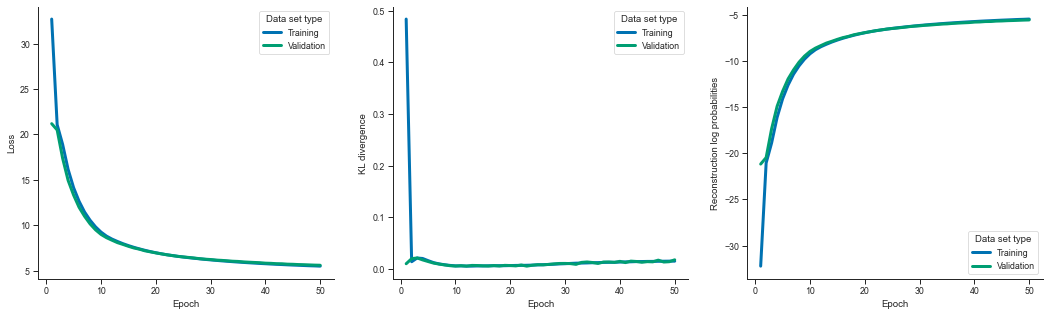

In [2]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)

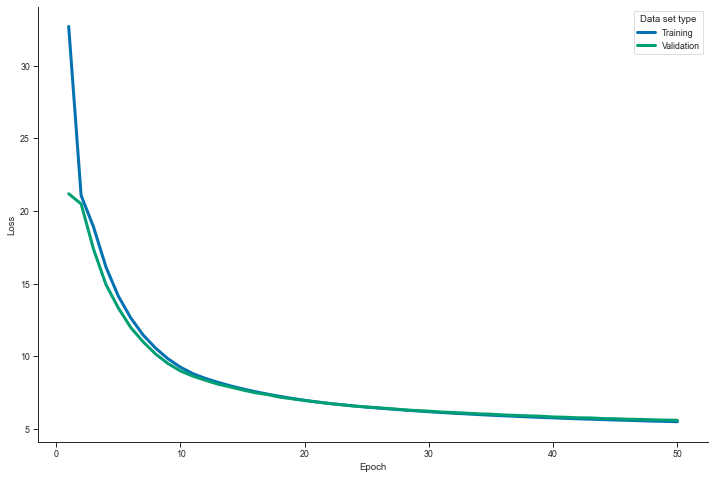

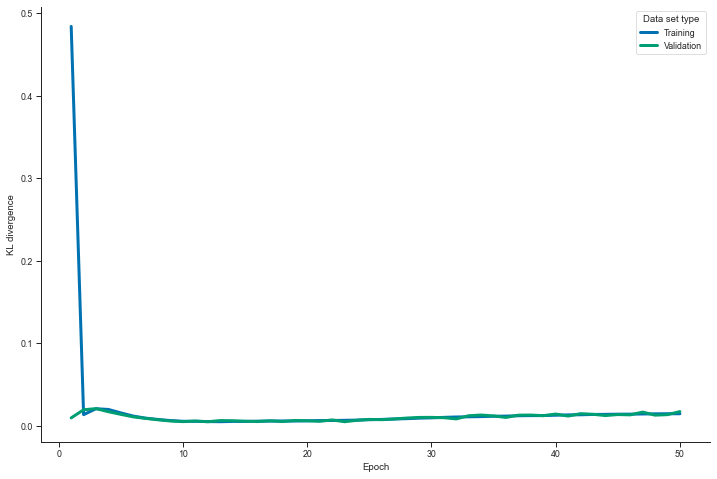

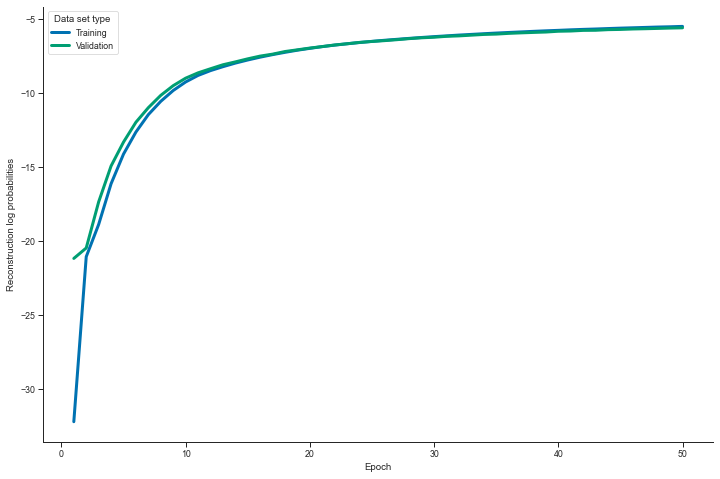

In [3]:
summary_models.plot_curves_large(df_default)

#  Add Scheduler

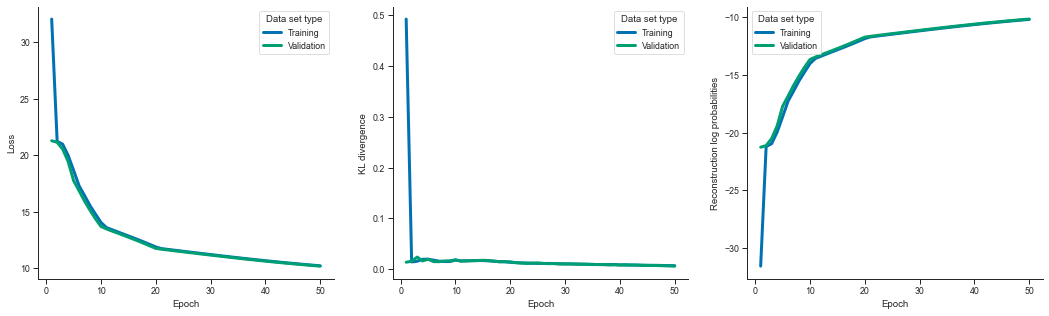

In [4]:
summary_models = SummaryModels(file_name, scheduler=True)
df_scheduler = summary_models.load_curves_df("Scheduler")
summary_models.plot_curves(df_scheduler)

#  Annealed Kullback–Leibler 

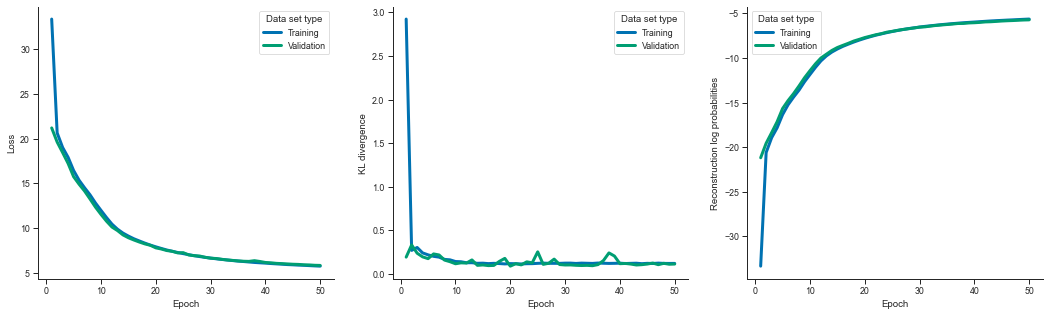

In [5]:
summary_models = SummaryModels(file_name, kl_annealing=True)
df_annealing = summary_models.load_curves_df("Annealing")
summary_models.plot_curves(df_annealing)

# Scheduler & Annealed Kullback–Leibler 

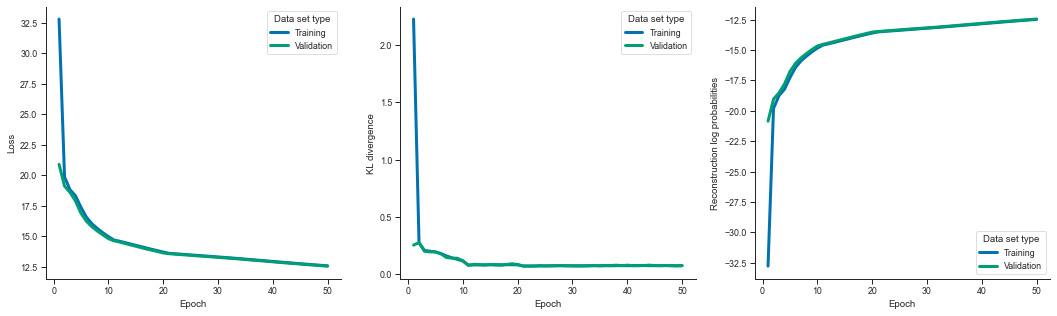

In [6]:
summary_models = SummaryModels(file_name, scheduler=True, kl_annealing=True)
df_scheduler_annealing = summary_models.load_curves_df("Scheduler_Annealing")
summary_models.plot_curves(df_scheduler_annealing)

# Different settings with no batch normalization

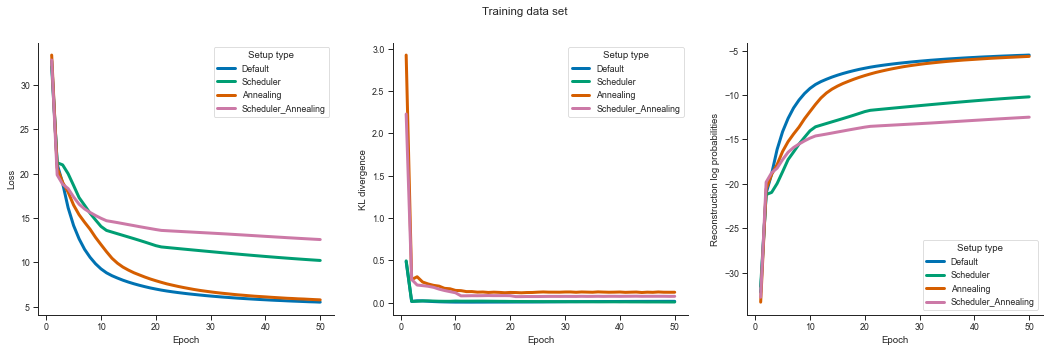

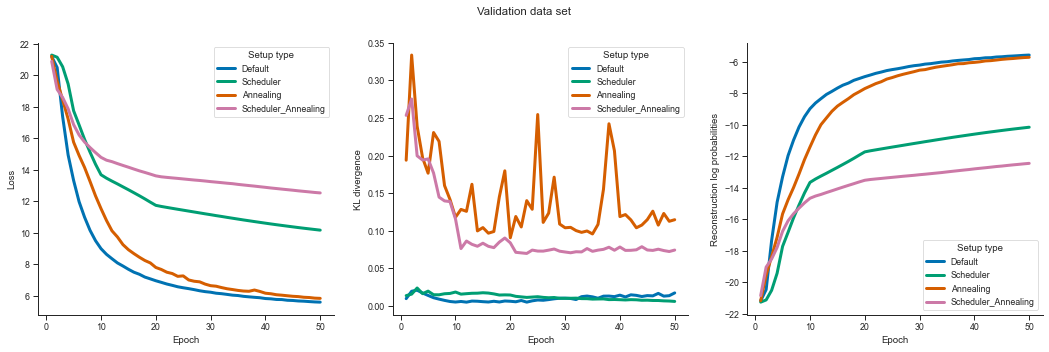

In [7]:
df = pd.concat([df_default, df_scheduler, df_annealing, df_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Scheduler", "Annealing", "Scheduler_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for cargo and tanker vessels

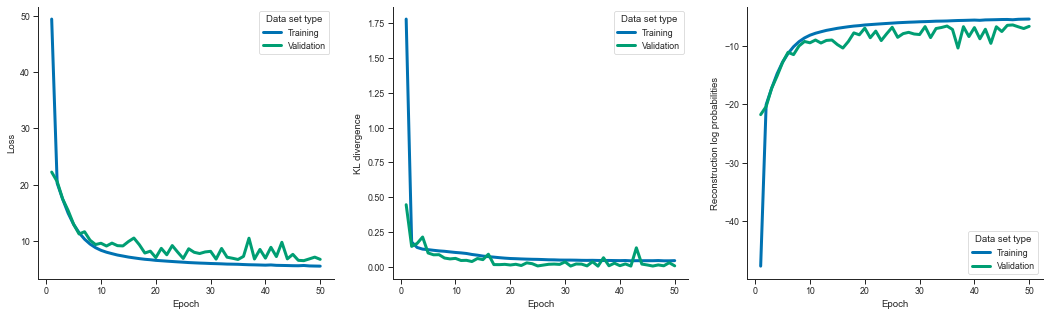

In [8]:
summary_models = SummaryModels(file_name, batch_norm=True)
df_batch_norm = summary_models.load_curves_df("Batch_Norm")
summary_models.plot_curves(df_batch_norm)

# Batch normalization & Scheduler

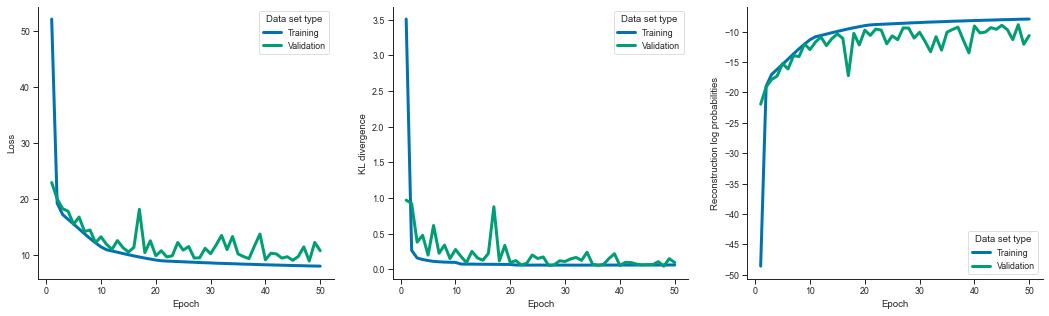

In [9]:
summary_models = SummaryModels(file_name, batch_norm=True, scheduler=True)
df_batch_norm_scheduler = summary_models.load_curves_df("Batch_Norm_Scheduler")
summary_models.plot_curves(df_batch_norm_scheduler)

#  Batch normalization & Annealed Kullback–Leibler 

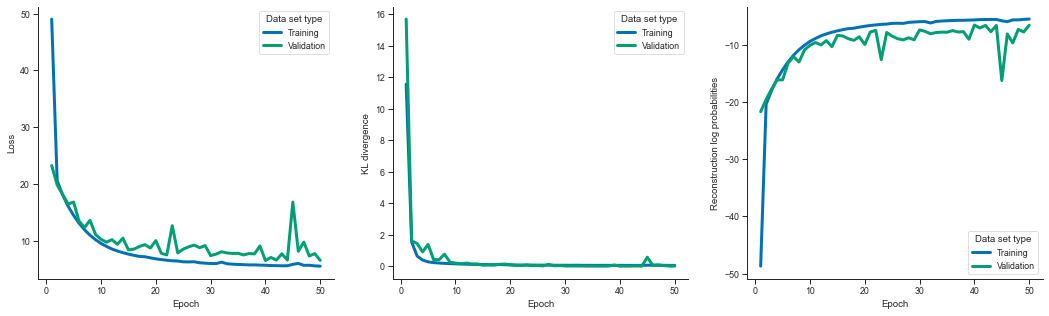

In [10]:
summary_models = SummaryModels(file_name, batch_norm=True, kl_annealing=True)
df_batch_norm_annealing = summary_models.load_curves_df("Batch_Norm_Annealing")
summary_models.plot_curves(df_batch_norm_annealing)

#  Batch normalization & Annealed Kullback–Leibler & Scheduler

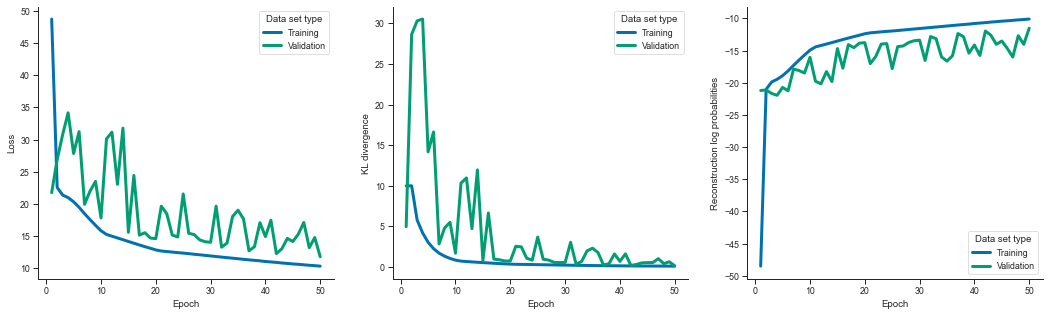

In [11]:
summary_models = SummaryModels(file_name, batch_norm=True, scheduler=True, kl_annealing=True)
df_batch_norm_scheduler_annealing = summary_models.load_curves_df("Batch_Norm_Scheduler_Annealing")
summary_models.plot_curves(df_batch_norm_scheduler_annealing)

# Different settings with batch normalization

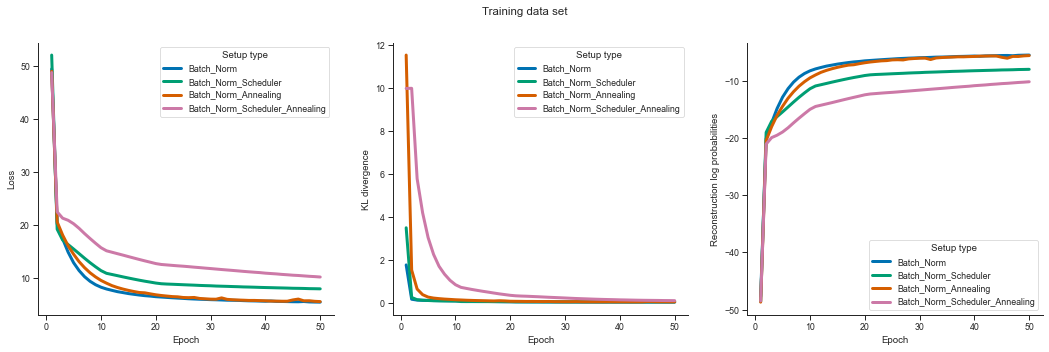

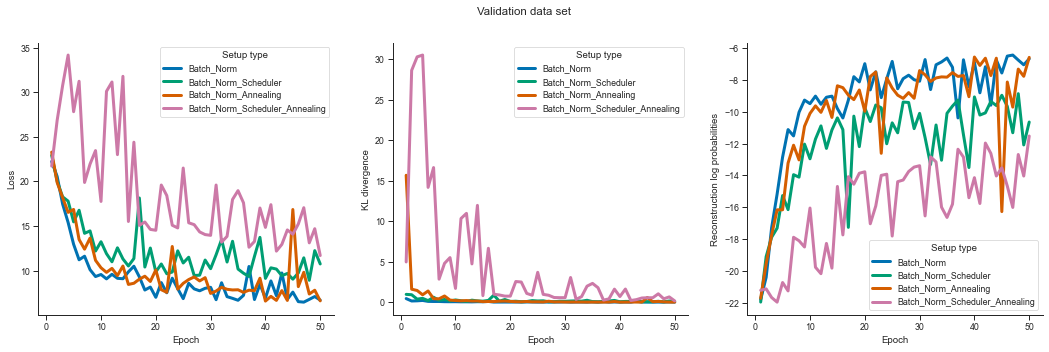

In [12]:
df = pd.concat([df_batch_norm, df_batch_norm_scheduler, df_batch_norm_annealing, df_batch_norm_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue_order = ["Batch_Norm", "Batch_Norm_Scheduler", "Batch_Norm_Annealing", "Batch_Norm_Scheduler_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Best setups (so far)

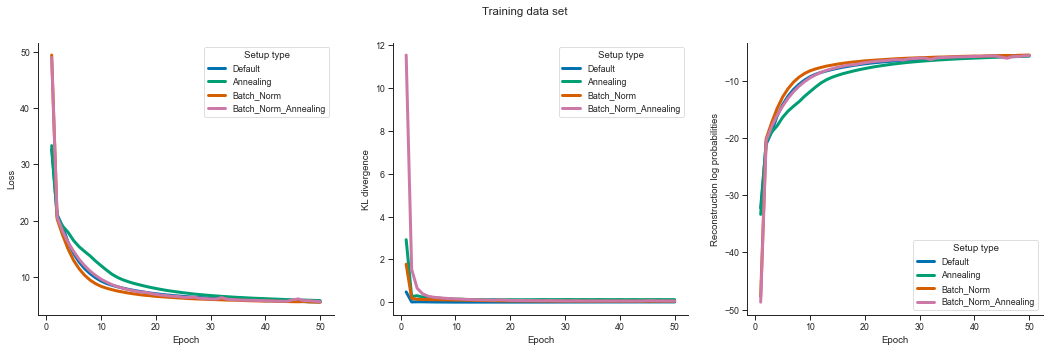

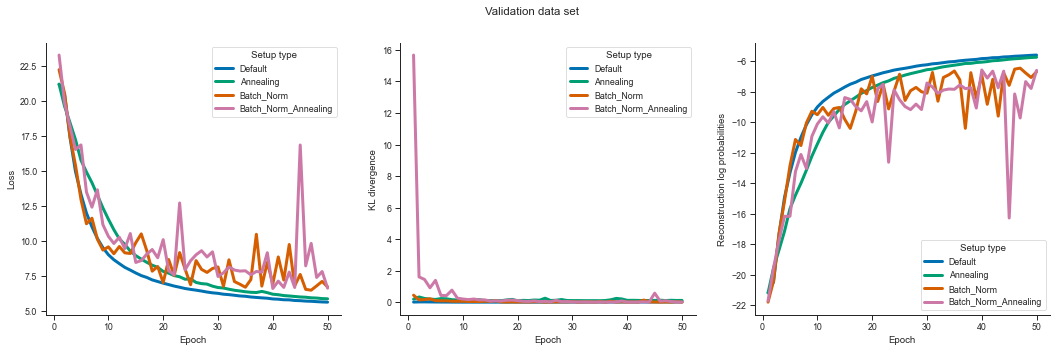

In [13]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities (by ship type)

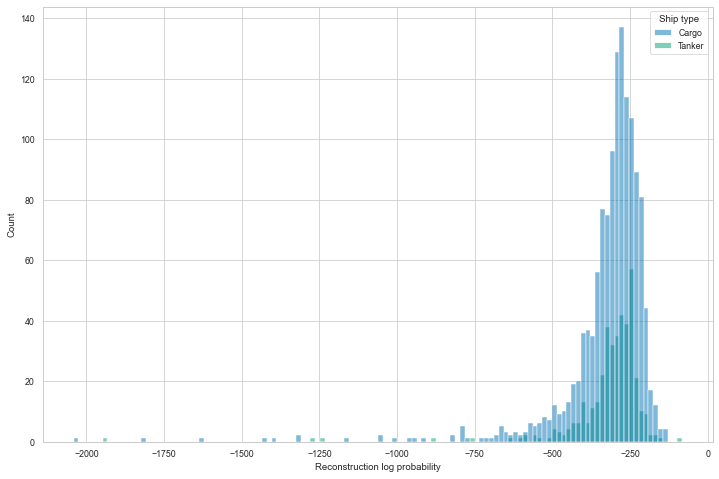

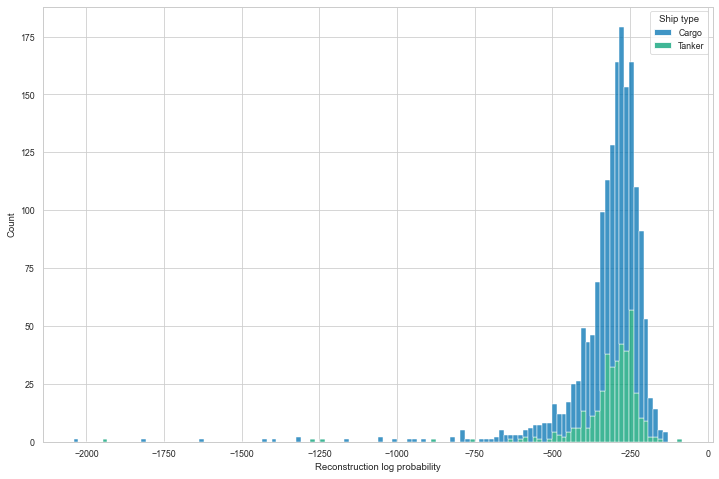

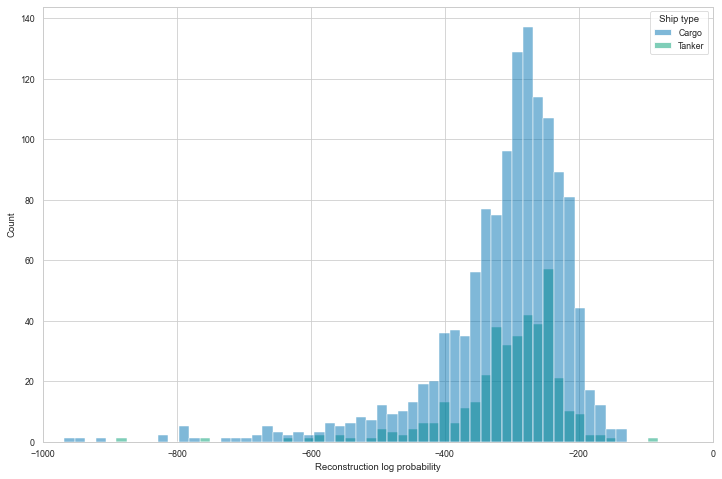

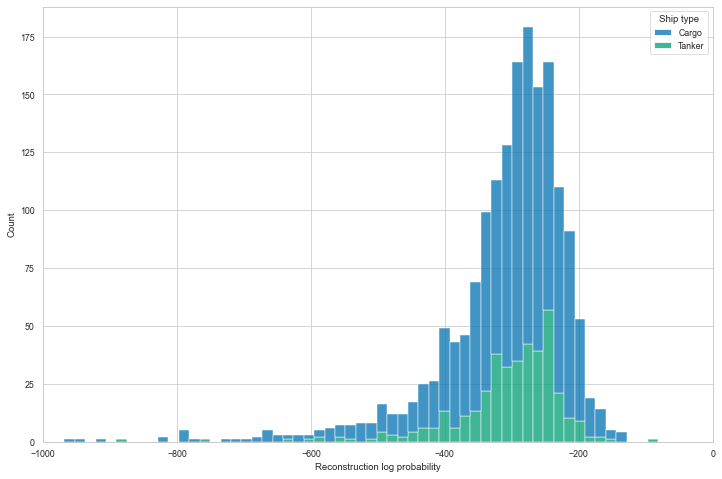

Mean Reconstruction log probability: -318.5585603949326
Median Reconstruction log probability: -289.50384521484375
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      1310.0 -319.816104  143.640369 -2041.569092 -345.139191   
Tanker      392.0 -314.356056  135.251769 -1943.548340 -335.854942   

                  50%         75%         max  
Ship type                                      
Cargo     -289.588867 -248.491974 -136.867828  
Tanker    -289.328415 -251.904404  -81.829140  


In [14]:
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation()["TrajectoryLevelData"]
x = "Reconstruction log probability"
hue = "Ship type"
hue_order = ["Cargo", "Tanker"]

# Plot trajectory based reconstruction log probabilities
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-1000, 0], print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

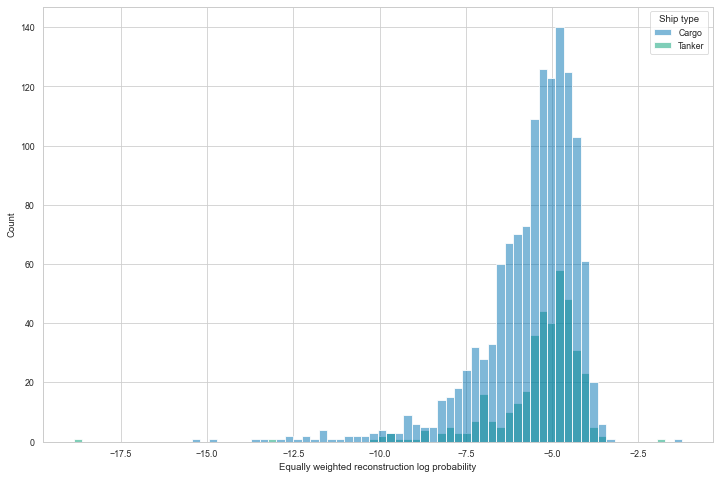

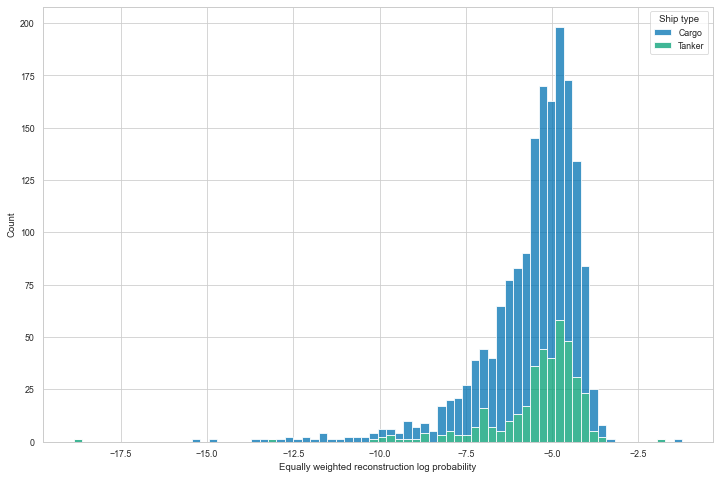

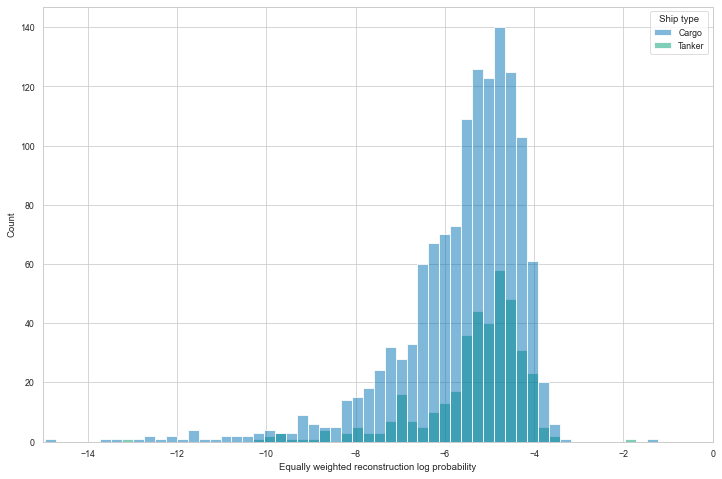

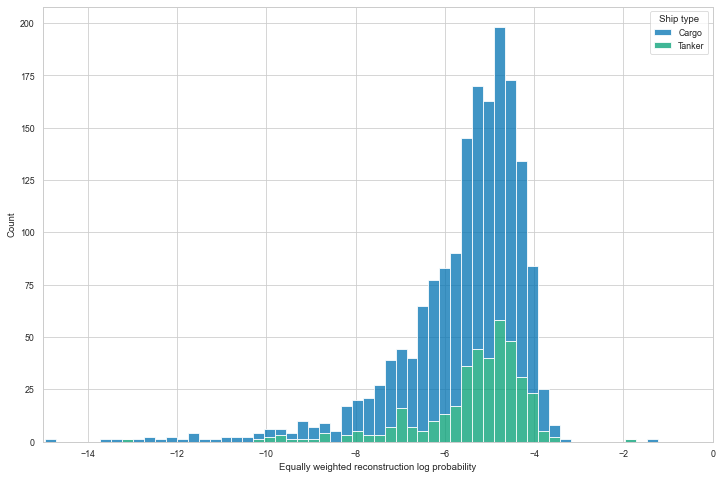

Mean Equally weighted reconstruction log probability: -5.5868575706862815
Median Equally weighted reconstruction log probability: -5.236784680283535
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      1310.0 -5.637628  1.473376 -15.350144 -6.201284 -5.303666   
Tanker      392.0 -5.417191  1.428422 -18.869401 -5.734038 -5.070643   

                75%       max  
Ship type                      
Cargo     -4.669449 -1.222034  
Tanker    -4.585934 -1.859753  


In [15]:
x = "Equally weighted reconstruction log probability"
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-15, 0], print_summary_stats=True)

In [16]:
# Look at some length statistics
data.groupby("Ship type")["Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Cargo,1310.0,57.541221,17.253010,25.0,45.0,57.0,67.00,142.0
Tanker,392.0,57.818878,11.647216,25.0,52.0,57.0,61.25,135.0
